In [1]:
import os
import json
import tensorflow as tf

In [7]:
import numpy as np

In [2]:
tfevent_home = '/mnt/sdb/xxl/code/selfSBIR_finetune/tensorboardlog/ImageNet_HED/'

In [3]:
record_name = ['canny200', 'mocoV2_fair', 'rnd_ege_200', 'imgnet_cls', 'mocoV2_my_200', 'rnd_mix_or_edge_200']

In [4]:
loss_records = []

In [5]:
for r_name in record_name:
    current_record = os.path.join(tfevent_home, r_name)
    r_file = os.listdir(current_record)[0]
    tfevent_record = os.path.join(current_record, r_file)
    l_record = []
    for event in tf.compat.v1.train.summary_iterator(tfevent_record):
        for value in event.summary.value:
            if value.tag == 'Train/Triplet':
                l_record.append(float(value.simple_value))
    loss_records.append(l_record)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [8]:
loss_records = np.asarray(loss_records)

In [9]:
np.shape(loss_records)

(6, 1000)

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

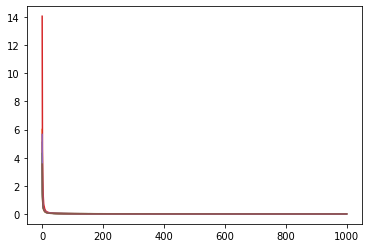

In [12]:
for i, r_name in enumerate(record_name):
    plt.plot(list(range(1000)), loss_records[i], label=record_name[i])

In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

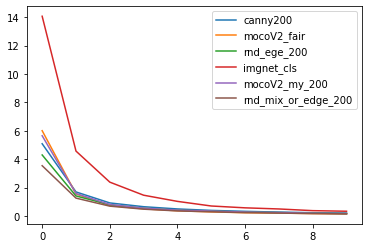

In [16]:
for i, r_name in enumerate(record_name):
    plt.plot(list(range(10)), loss_records[i][:10], label=record_name[i])
plt.legend()